In [11]:
import pandas as pd
import numpy as np
import os
import glob

In [12]:
files = [file for file in os.listdir('./Sales_data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv('all_data.csv', index = False)

In [13]:
all_data = pd.read_csv('all_data.csv')


In [14]:
all_data.loc[:,'Order Date'].dropna(inplace = True)
all_data = all_data[all_data['Order Date'] != 'Order Date']

In [15]:
all_data = all_data[all_data['Order Date'].notna()]

In [16]:
all_data.loc[:,'month'] = all_data['Order Date'].str[0:2]
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [17]:
all_data['month'] = all_data['month'].astype('int32')

In [18]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

In [19]:
all_data['Price Each'] = all_data['Price Each'].astype('float64')

In [20]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [21]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [22]:
sales_by_month = all_data.groupby('month')['Sales'].sum()
best_month = sales_by_month.idxmax()
best_month_data = all_data[all_data['month'] == best_month]
best_month_data



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
30394,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
30395,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
30396,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
30397,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
30398,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
153029,293993,AAA Batteries (4-pack),1,2.99,12/01/19 00:41,"999 10th St, San Francisco, CA 94016",12,2.99
153134,294093,USB-C Charging Cable,1,11.95,12/01/19 00:37,"51 Cherry St, New York City, NY 10001",12,11.95
153499,294441,Wired Headphones,1,11.99,12/01/19 00:52,"469 Sunset St, San Francisco, CA 94016",12,11.99
153696,294629,Wired Headphones,1,11.99,12/01/19 01:54,"668 Ridge St, San Francisco, CA 94016",12,11.99


In [23]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [24]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str[1]

In [25]:
all_data['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [26]:
sales_by_city = all_data['Sales'].groupby(all_data['city']).sum()
sales_by_city

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [27]:
import matplotlib.pyplot as plt



In [28]:
sales_by_city = all_data.groupby(['city']).sum()['Sales']
sales_by_city

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

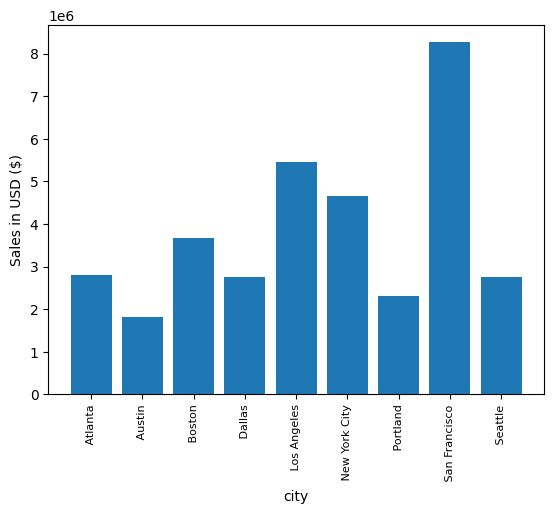

In [29]:
import matplotlib.pyplot as plt

sales_by_city = all_data.groupby('city')['Sales'].sum()
keys = sales_by_city.index

plt.bar(keys, sales_by_city)
plt.ylabel('Sales in USD ($)')
plt.xlabel('city')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [30]:
all_data.head(25)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston


In [31]:
all_data['Purchase Hour'] = all_data['Order Date'].str.split(' ').str[1].str[0:2]

In [40]:
hourly_sales = all_data['Order Date'].str.split(' ').str[1].str[0:2]

sales_by_hour = all_data[['Purchase Hour', 'Sales']].groupby('Purchase Hour')['Sales'].sum()
sales_by_hour

Purchase Hour
00     713721.27
01     460866.88
02     234851.44
03     145757.89
04     162661.01
05     230679.82
06     448113.00
07     744854.12
08    1192348.97
09    1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

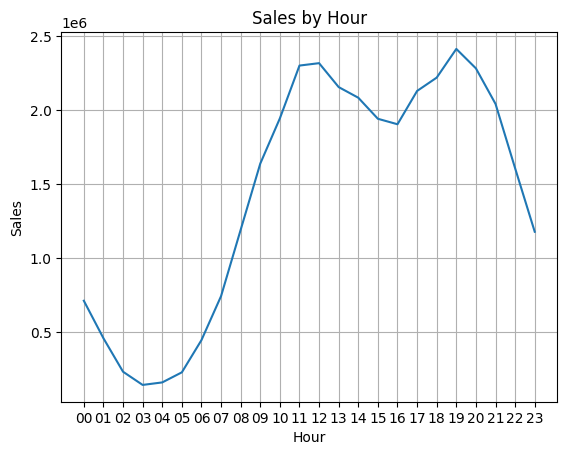

In [38]:
import matplotlib.pyplot as plt

sales_by_hour = all_data[['Purchase Hour', 'Sales']].groupby('Purchase Hour')['Sales'].sum()

plt.plot(sales_by_hour.index, sales_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Sales by Hour')
plt.grid(True)
plt.show()

In [34]:
all_data[all_data['Product'] == 'USB-C Charging Cable']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Purchase Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10
17,176573,USB-C Charging Cable,1,11.95,04/27/19 18:41,"214 Chestnut St, San Francisco, CA 94016",4,11.95,San Francisco,18
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
...,...,...,...,...,...,...,...,...,...,...
186830,259339,USB-C Charging Cable,2,11.95,09/12/19 23:43,"509 Park St, Austin, TX 73301",9,23.90,Austin,23
186834,259343,USB-C Charging Cable,1,11.95,09/14/19 19:30,"675 Maple St, Austin, TX 73301",9,11.95,Austin,19
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco,13
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco,15


In [35]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Purchase Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,07
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [37]:
sales_by_city = all_data[['city', 'Sales']].groupby('city').sum()['Sales']
sales_by_city

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [45]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

In [46]:
df.head(25)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Purchase Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11


C:\Users\Tural\AppData\Local\Temp\ipykernel_10084\1479584812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: '|'.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Purchase Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,Google Phone|Wired Headphones
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,Google Phone|Wired Headphones
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,Google Phone|USB-C Charging Cable
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,Google Phone|USB-C Charging Cable
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,Bose SoundSport Headphones|Bose SoundSport Hea...
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,34in Ultrawide Monitor|AA Batteries (4-pack)
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,00,Wired Headphones|AAA Batteries (4-pack)
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,00,Wired Headphones|AAA Batteries (4-pack)
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,Google Phone|USB-C Charging Cable


In [70]:

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: '|'.join(x))



C:\Users\Tural\AppData\Local\Temp\ipykernel_10084\138856956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: '|'.join(x))


In [73]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split('|')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(100):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
('Lightning Charging Cable', 'Apple Airpods Headphones') 214
('USB-C Charging Cable', 'Bose SoundSport Headphones') 211
('Vareebadd Phone', 'Bose SoundSport Headphones') 182
('Apple Airpods Headphones', 'Wired Headphones') 170
('Bose SoundSport Headphones', 'Wired Headphones') 140
('Lightning Charging Cable', 'USB-C Charging Cable') 120
('Lightning Charging Cable', 'AA Batteries (4-pack)') 114
('Lightning Charging Cable', 'Lightning Charging Cable') 111
('AA Batteries (4-pack)', 'Lightning Charging Cable') 102
('AAA Batteries (4-pack)', 'US

In [77]:
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
product_quantity = product_quantity.sort_values(ascending = False)


C:\Users\Tural\AppData\Local\Temp\ipykernel_10084\1245467340.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_quantity.index, rotation=90)


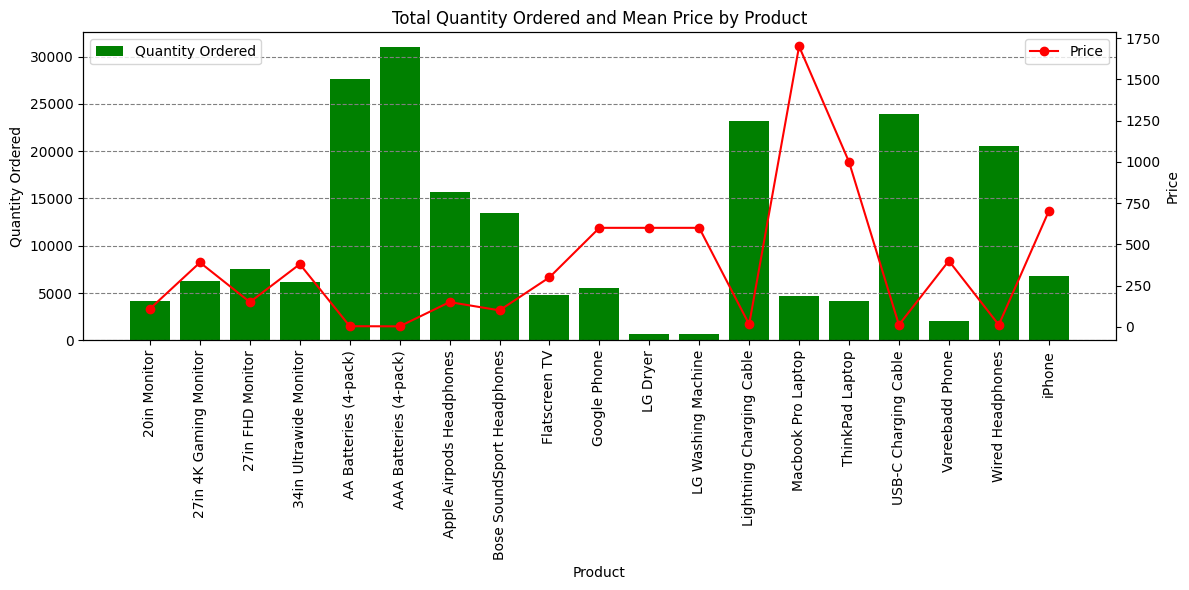

In [91]:
import matplotlib.pyplot as plt

# Calculate the sum of 'Quantity Ordered' for each product
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum()

# Calculate the mean 'Price Each' for each product
product_prices = all_data.groupby('Product')['Price Each'].mean()

# Create the figure and axes objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar graph for quantity ordered
ax1.bar(product_quantity.index, product_quantity, color='g')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax1.set_title('Total Quantity Ordered and Mean Price by Product')
ax1.set_xticklabels(product_quantity.index, rotation=90)

# Create the second y-axis for prices
ax2 = ax1.twinx()
ax2.plot(product_prices.index, product_prices, color='r', marker='o')
ax2.set_ylabel('Price')

# Show the legend for both graphs
ax1.legend(['Quantity Ordered'], loc='upper left')
ax2.legend(['Price'], loc='upper right')
ax1.grid(True, axis='y', linestyle='--', color='gray')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
prices = all_data.groupby('Product')['Price Each'].mean()


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [80]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,Purchase Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,07
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17
